In [1]:
import tensorflow as tf
import numpy as np
import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
x_test.shape

(10000, 28, 28)

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [4]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LeakyReLU, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3)))
model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3)))
model.add(Conv2D(32, kernel_size=(5,5)))
model.add(Conv2D(64, kernel_size=(1,1)))
model.add(Conv2D(128, kernel_size=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu', kernel_initializer="he_normal"))
model.add(BatchNormalization())
# model.add(Dropout(0.05))
model.add(Dense(64, activation='relu', kernel_initializer="he_normal"))
model.add(BatchNormalization())
# model.add(Dropout(0.05))
model.add(Dense(32, activation='relu', kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(10,activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, validation_split=0.1, epochs=20, batch_size=64, callbacks = [ModelCheckpoint('/content/model.h5',save_best_only=True)])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/20





54000/54000 [==============================] - 16s 292us/step - loss: 0.2688 - acc: 0.9277 - val_loss: 0.1849 - val_acc: 0.9445
Epoch 2/20
54000/54000 [==============================] - 12s 227us/step - loss: 0.1008 - acc: 0.9711 - val_loss: 0.0657 - val_acc: 0.9802
Epoch 3/20
54000/54000 [==============================] - 13s 238us/step - loss: 0.0819 - acc: 0.9762 - val_loss: 0.0603 - val_acc: 0.9817
Epoch 4/20
54000/54000 [==============================] - 12s 229us/step - loss: 0.0665 - acc: 0.9802 - val_loss: 0.0491 - val_acc: 0.9847
Epoch 5/20
54000/54000 [==============================] - 12s 229us/step - loss: 0.0593 - acc: 0.9831 - val_loss: 0.0541 - val_acc: 0.9837
Epoch 6/20
54000/54000 [========

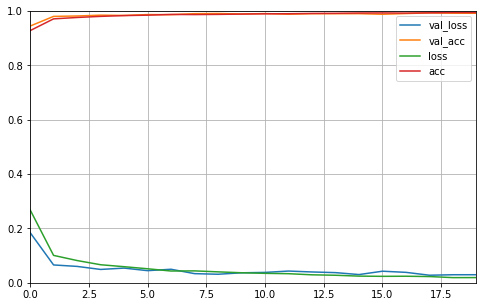

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)

In [8]:
con=tf.math.confusion_matrix(y_test,y_pred)
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[ 974    0    1    0    0    0    3    1    1    0]
 [   0 1127    0    0    1    0    1    4    1    1]
 [   1    1 1023    0    1    0    0    4    2    0]
 [   0    0    1 1005    0    2    0    0    0    2]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    0    0    5    0  880    2    1    2    1]
 [   3    2    0    0    1    1  947    0    4    0]
 [   0    1    8    0    0    0    0 1017    1    1]
 [   0    0    0    2    0    0    0    1  969    2]
 [   1    1    0    0    6    0    0    9    6  986]]


In [0]:
import matplotlib.pyplot as plt


In [0]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_pred)

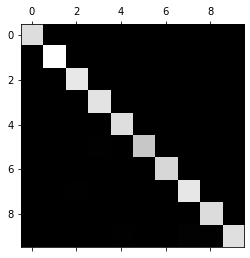

In [11]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

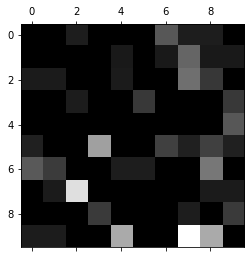

In [13]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [14]:
model = load_model('/content/model.h5')
result = model.evaluate(x_test, y_test)
result

10000/10000 [==============================] - 1s 122us/step


[0.03030618621237518, 0.9914]

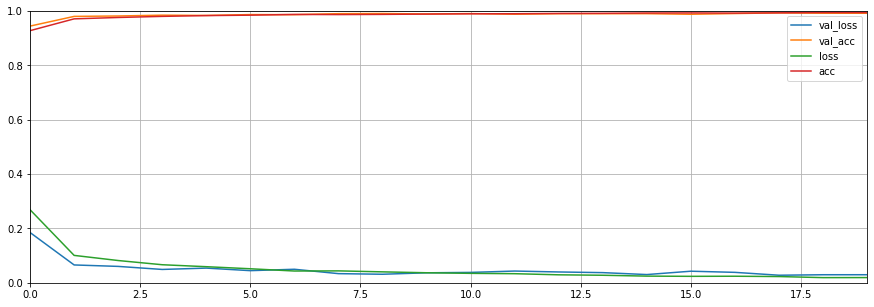

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
model.save

<bound method Network.save of <keras.engine.sequential.Sequential object at 0x7fa1d5457b00>>